# **Enhancing Object Detection in YOLOS-Small through Advanced LoRA Methods**


# NOTE: This file is intended for DISPLAY PURPOSES ONLY and will NOT run independently.  
For full execution, please refer to the complete script:  


```
Enhancing_YOLOS_S_through_Advanced_LoRA_Methods.py
```


This file contains extracted sections to showcase outputs in GitHub.


## **6. Implementing LoRA Variants**


###  **(a) LoRA**






#### **LoraConfig**

In [ ]:
# Define model for LoRA
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_for_LoRA = YolosForObjectDetection.from_pretrained(model_name).to(device)

# Configure LoRA
lora_config = LoraConfig(
    r=16,
    lora_alpha=8,
    lora_dropout=0.5,
    target_modules=target_modules
)

# Apply LoRA to the model
model_with_LoRA = get_peft_model(model_for_LoRA, lora_config)
model_with_LoRA.print_trainable_parameters()


trainable params: 294,912 || all params: 30,979,680 || trainable%: 0.9520


In [ ]:
# Inspect LoRA Layers
for name, param in model_with_LoRA.named_parameters():
    print(f"{name} - requires_grad: {param.requires_grad}")

for name, param in model_with_LoRA.named_parameters():
    if "lora" in name:
        print(name, param.shape)


base_model.model.vit.embeddings.cls_token - requires_grad: False
base_model.model.vit.embeddings.detection_tokens - requires_grad: False
base_model.model.vit.embeddings.position_embeddings - requires_grad: False
base_model.model.vit.embeddings.patch_embeddings.projection.weight - requires_grad: False
base_model.model.vit.embeddings.patch_embeddings.projection.bias - requires_grad: False
base_model.model.vit.encoder.mid_position_embeddings - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.weight - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.bias - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_A.default.weight - requires_grad: True
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_B.default.weight - requires_grad: True
base_model.model.vit.encoder.layer.0.attention.attention.key.weight - requires_grad: False
base_model.model.vit.en

In [ ]:
# Mean value of LoRA layers before training
for name, param in model_with_LoRA.named_parameters():
    if "lora" in name:
        print(f"{name} mean before training: {param.data.mean().item():.6f}")


base_model.model.vit.encoder.layer.0.attention.attention.query.lora_A.default.weight mean before training: -0.000073
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_B.default.weight mean before training: 0.000000
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_A.default.weight mean before training: 0.000168
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_B.default.weight mean before training: 0.000000
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_A.default.weight mean before training: 0.000338
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_B.default.weight mean before training: 0.000000
base_model.model.vit.encoder.layer.1.attention.attention.value.lora_A.default.weight mean before training: 0.000129
base_model.model.vit.encoder.layer.1.attention.attention.value.lora_B.default.weight mean before training: 0.000000
base_model.model.vit.encoder.layer.2.attention.attention.query.lora_A.d

In [ ]:
lora_total_parameters = [p for p in model_with_LoRA.parameters()]
print(f"Number of LoRA parameter tensors: {len(lora_total_parameters)}")

lora_parameters = [p for p in model_with_LoRA.parameters() if p.requires_grad]
print(f"Number of LoRA trainable parameter tensors (requires_grad=True): {len(lora_parameters)}")


Number of LoRA parameter tensors: 260
Number of LoRA trainable parameter tensors (requires_grad=True): 48


#### **Train Model with LoRA**

  0%|          | 1/368 [00:03<22:12,  3.63s/it]

Epoch 1, Batch 0: Loss = 1.0439


  3%|▎         | 11/368 [00:38<21:49,  3.67s/it]

Epoch 1, Batch 10: Loss = 1.2853


  6%|▌         | 21/368 [01:11<23:45,  4.11s/it]

Epoch 1, Batch 20: Loss = 0.9438


  8%|▊         | 31/368 [01:56<26:04,  4.64s/it]

Epoch 1, Batch 30: Loss = 0.9441


 11%|█         | 41/368 [02:39<22:41,  4.17s/it]

Epoch 1, Batch 40: Loss = 1.2783


 14%|█▍        | 51/368 [03:22<21:52,  4.14s/it]

Epoch 1, Batch 50: Loss = 1.2128


 17%|█▋        | 61/368 [04:04<20:23,  3.99s/it]

Epoch 1, Batch 60: Loss = 1.1738


 19%|█▉        | 71/368 [04:47<25:47,  5.21s/it]

Epoch 1, Batch 70: Loss = 1.0456


 22%|██▏       | 81/368 [05:25<18:43,  3.91s/it]

Epoch 1, Batch 80: Loss = 1.2817


 25%|██▍       | 91/368 [05:59<15:48,  3.43s/it]

Epoch 1, Batch 90: Loss = 1.1582


 27%|██▋       | 101/368 [06:40<18:35,  4.18s/it]

Epoch 1, Batch 100: Loss = 1.1365


 30%|███       | 111/368 [07:17<14:56,  3.49s/it]

Epoch 1, Batch 110: Loss = 0.6536


 33%|███▎      | 121/368 [08:06<21:01,  5.11s/it]

Epoch 1, Batch 120: Loss = 1.1212


 36%|███▌      | 131/368 [08:47<16:02,  4.06s/it]

Epoch 1, Batch 130: Loss = 0.6558


 38%|███▊      | 141/368 [09:29<17:52,  4.72s/it]

Epoch 1, Batch 140: Loss = 1.2668


 41%|████      | 151/368 [10:07<12:57,  3.59s/it]

Epoch 1, Batch 150: Loss = 1.1283


 44%|████▍     | 161/368 [10:50<15:10,  4.40s/it]

Epoch 1, Batch 160: Loss = 1.0247


 46%|████▋     | 171/368 [11:20<09:41,  2.95s/it]

Epoch 1, Batch 170: Loss = 1.3316


 49%|████▉     | 181/368 [12:03<11:44,  3.77s/it]

Epoch 1, Batch 180: Loss = 0.9413


 52%|█████▏    | 191/368 [12:41<12:15,  4.16s/it]

Epoch 1, Batch 190: Loss = 1.0230


 55%|█████▍    | 201/368 [13:24<13:29,  4.85s/it]

Epoch 1, Batch 200: Loss = 0.9146


 57%|█████▋    | 211/368 [14:05<10:28,  4.00s/it]

Epoch 1, Batch 210: Loss = 1.0592


 60%|██████    | 221/368 [14:44<07:48,  3.19s/it]

Epoch 1, Batch 220: Loss = 1.2660


 63%|██████▎   | 231/368 [15:26<08:52,  3.89s/it]

Epoch 1, Batch 230: Loss = 0.9779


 65%|██████▌   | 241/368 [16:01<08:36,  4.07s/it]

Epoch 1, Batch 240: Loss = 1.1087


 68%|██████▊   | 251/368 [16:41<07:44,  3.97s/it]

Epoch 1, Batch 250: Loss = 0.8739


 71%|███████   | 261/368 [17:22<07:55,  4.44s/it]

Epoch 1, Batch 260: Loss = 1.0697


 74%|███████▎  | 271/368 [18:01<06:45,  4.18s/it]

Epoch 1, Batch 270: Loss = 1.1004


 76%|███████▋  | 281/368 [18:47<05:39,  3.90s/it]

Epoch 1, Batch 280: Loss = 1.4351


 79%|███████▉  | 291/368 [19:19<04:11,  3.27s/it]

Epoch 1, Batch 290: Loss = 0.8354


 82%|████████▏ | 301/368 [20:02<04:26,  3.97s/it]

Epoch 1, Batch 300: Loss = 0.9565


 85%|████████▍ | 311/368 [20:44<04:26,  4.68s/it]

Epoch 1, Batch 310: Loss = 1.0971


 87%|████████▋ | 321/368 [21:32<04:06,  5.24s/it]

Epoch 1, Batch 320: Loss = 1.0111


 90%|████████▉ | 331/368 [22:16<02:27,  3.98s/it]

Epoch 1, Batch 330: Loss = 0.9043


 93%|█████████▎| 341/368 [23:04<02:19,  5.17s/it]

Epoch 1, Batch 340: Loss = 0.9418


 95%|█████████▌| 351/368 [23:42<01:18,  4.63s/it]

Epoch 1, Batch 350: Loss = 1.2409


 98%|█████████▊| 361/368 [24:16<00:23,  3.40s/it]

Epoch 1, Batch 360: Loss = 1.0237


100%|██████████| 368/368 [24:39<00:00,  4.02s/it]


Epoch 1 Complete. Average train Loss: 4.2278, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:00<00:00,  1.14s/it]


Epoch 1 - Validation Loss: 4.0007


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.942 at location [0.95, 266.42, 323.35, 635.11]
Detected teddy bear with confidence 0.58 at location [303.82, 65.65, 427.69, 413.85]
Detected teddy bear with confidence 0.91 at location [198.31, 220.02, 352.97, 531.08]
Detected teddy bear with confidence 0.684 at location [298.24, 66.84, 427.97, 537.15]
Detected teddy bear with confidence 0.966 at location [109.45, 1.39, 427.56, 534.24]
Detected teddy bear with confidence 0.985 at location [0.04, 54.89, 197.39, 286.43]
Detected teddy bear with confidence 0.62 at location [103.04, 417.49, 321.27, 638.82]


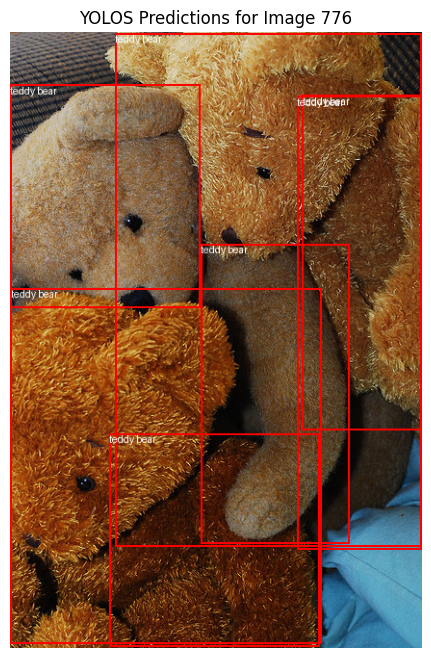

100%|██████████| 630/630 [02:25<00:00,  4.32it/s]


mAP@[0.5:0.95]: tensor(0.3887)
Detailed mAP results: {'map': tensor(0.3887), 'map_50': tensor(0.5648), 'map_75': tensor(0.4179), 'map_small': tensor(0.1302), 'map_medium': tensor(0.3431), 'map_large': tensor(0.5545), 'mar_1': tensor(0.3178), 'mar_10': tensor(0.4626), 'mar_100': tensor(0.4765), 'mar_small': tensor(0.1860), 'mar_medium': tensor(0.4407), 'mar_large': tensor(0.6362), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 1 - Validation mAP Score: 0.3887


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.388673  0.564787  0.417945   0.130238    0.343136   0.554492  0.317847   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.462648  0.476465   0.185994    0.440748   0.636167           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3887 at epoch 1


  0%|          | 1/368 [00:06<38:30,  6.30s/it]

Epoch 2, Batch 0: Loss = 0.7341


  3%|▎         | 11/368 [00:45<23:01,  3.87s/it]

Epoch 2, Batch 10: Loss = 0.9911


  6%|▌         | 21/368 [01:26<20:00,  3.46s/it]

Epoch 2, Batch 20: Loss = 0.9785


  8%|▊         | 31/368 [02:03<19:29,  3.47s/it]

Epoch 2, Batch 30: Loss = 1.0197


 11%|█         | 41/368 [02:48<27:10,  4.99s/it]

Epoch 2, Batch 40: Loss = 1.0391


 14%|█▍        | 51/368 [03:31<20:58,  3.97s/it]

Epoch 2, Batch 50: Loss = 1.0212


 17%|█▋        | 61/368 [04:12<22:53,  4.48s/it]

Epoch 2, Batch 60: Loss = 0.9283


 19%|█▉        | 71/368 [04:57<22:23,  4.52s/it]

Epoch 2, Batch 70: Loss = 1.0187


 22%|██▏       | 81/368 [05:38<17:26,  3.65s/it]

Epoch 2, Batch 80: Loss = 0.9704


 25%|██▍       | 91/368 [06:17<16:33,  3.59s/it]

Epoch 2, Batch 90: Loss = 1.0010


 27%|██▋       | 101/368 [06:56<21:06,  4.74s/it]

Epoch 2, Batch 100: Loss = 0.8641


 30%|███       | 111/368 [07:40<18:14,  4.26s/it]

Epoch 2, Batch 110: Loss = 0.8622


 33%|███▎      | 121/368 [08:20<16:41,  4.05s/it]

Epoch 2, Batch 120: Loss = 1.0101


 36%|███▌      | 131/368 [09:04<15:50,  4.01s/it]

Epoch 2, Batch 130: Loss = 0.9473


 38%|███▊      | 141/368 [09:45<15:22,  4.06s/it]

Epoch 2, Batch 140: Loss = 0.8714


 41%|████      | 151/368 [10:21<14:38,  4.05s/it]

Epoch 2, Batch 150: Loss = 0.8843


 44%|████▍     | 161/368 [11:01<13:23,  3.88s/it]

Epoch 2, Batch 160: Loss = 1.0843


 46%|████▋     | 171/368 [11:38<11:08,  3.39s/it]

Epoch 2, Batch 170: Loss = 1.0746


 49%|████▉     | 181/368 [12:21<14:11,  4.56s/it]

Epoch 2, Batch 180: Loss = 0.9555


 52%|█████▏    | 191/368 [13:07<13:13,  4.48s/it]

Epoch 2, Batch 190: Loss = 0.9588


 55%|█████▍    | 201/368 [13:49<11:37,  4.18s/it]

Epoch 2, Batch 200: Loss = 0.7345


 57%|█████▋    | 211/368 [14:27<10:21,  3.96s/it]

Epoch 2, Batch 210: Loss = 1.0146


 60%|██████    | 221/368 [15:17<12:18,  5.03s/it]

Epoch 2, Batch 220: Loss = 0.9099


 63%|██████▎   | 231/368 [15:56<07:25,  3.25s/it]

Epoch 2, Batch 230: Loss = 0.8645


 65%|██████▌   | 241/368 [16:36<07:27,  3.52s/it]

Epoch 2, Batch 240: Loss = 0.8307


 68%|██████▊   | 251/368 [17:11<07:19,  3.75s/it]

Epoch 2, Batch 250: Loss = 0.9683


 71%|███████   | 261/368 [17:56<08:41,  4.88s/it]

Epoch 2, Batch 260: Loss = 0.7088


 74%|███████▎  | 271/368 [18:36<06:24,  3.96s/it]

Epoch 2, Batch 270: Loss = 0.8607


 76%|███████▋  | 281/368 [19:20<06:44,  4.65s/it]

Epoch 2, Batch 280: Loss = 0.9180


 79%|███████▉  | 291/368 [20:00<04:49,  3.76s/it]

Epoch 2, Batch 290: Loss = 1.0788


 82%|████████▏ | 301/368 [20:40<04:58,  4.46s/it]

Epoch 2, Batch 300: Loss = 0.8330


 85%|████████▍ | 311/368 [21:17<03:06,  3.28s/it]

Epoch 2, Batch 310: Loss = 0.8217


 87%|████████▋ | 321/368 [21:57<02:53,  3.69s/it]

Epoch 2, Batch 320: Loss = 0.8338


 90%|████████▉ | 331/368 [22:35<02:09,  3.49s/it]

Epoch 2, Batch 330: Loss = 0.9615


 93%|█████████▎| 341/368 [23:14<01:54,  4.23s/it]

Epoch 2, Batch 340: Loss = 0.7591


 95%|█████████▌| 351/368 [23:59<01:11,  4.21s/it]

Epoch 2, Batch 350: Loss = 0.8952


 98%|█████████▊| 361/368 [24:38<00:27,  3.90s/it]

Epoch 2, Batch 360: Loss = 0.7096


100%|██████████| 368/368 [25:03<00:00,  4.09s/it]


Epoch 2 Complete. Average train Loss: 3.7213, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:00<00:00,  1.14s/it]


Epoch 2 - Validation Loss: 3.3858


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.503 at location [348.84, 69.13, 427.75, 425.17]
Detected teddy bear with confidence 0.945 at location [0.89, 265.04, 322.75, 635.43]
Detected teddy bear with confidence 0.785 at location [304.07, 66.49, 427.63, 416.03]
Detected teddy bear with confidence 0.956 at location [200.12, 218.49, 352.2, 532.62]
Detected teddy bear with confidence 0.8 at location [298.85, 67.79, 428.07, 539.71]
Detected teddy bear with confidence 0.959 at location [110.7, 1.32, 427.55, 535.24]
Detected teddy bear with confidence 0.986 at location [-0.14, 55.68, 196.74, 289.43]
Detected teddy bear with confidence 0.767 at location [103.52, 416.14, 321.17, 638.87]


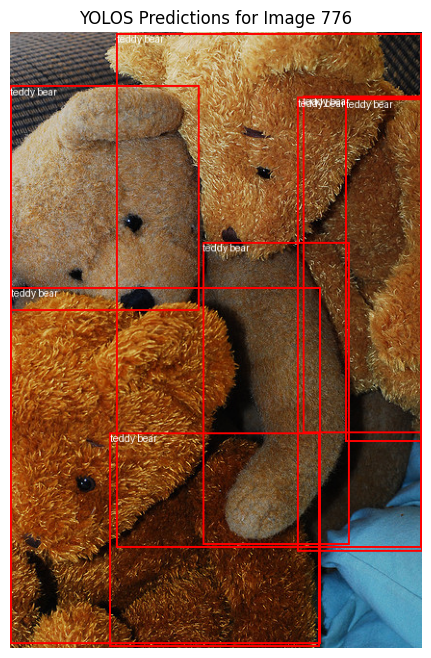

100%|██████████| 630/630 [02:26<00:00,  4.31it/s]


mAP@[0.5:0.95]: tensor(0.3684)
Detailed mAP results: {'map': tensor(0.3684), 'map_50': tensor(0.5487), 'map_75': tensor(0.3946), 'map_small': tensor(0.1081), 'map_medium': tensor(0.3334), 'map_large': tensor(0.5492), 'mar_1': tensor(0.2976), 'mar_10': tensor(0.4532), 'mar_100': tensor(0.4723), 'mar_small': tensor(0.1584), 'mar_medium': tensor(0.4493), 'mar_large': tensor(0.6477), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 2 - Validation mAP Score: 0.3684


map   map_50  map_75  map_small  map_medium  map_large     mar_1  \
0  0.368444  0.54871  0.3946   0.108052    0.333446   0.549201  0.297627   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.453233  0.472272   0.158374    0.449333   0.647662           -1.0   

   mar_100_per_class  
0               -1.0

  0%|          | 1/368 [00:02<16:38,  2.72s/it]

Epoch 3, Batch 0: Loss = 0.8450


  3%|▎         | 11/368 [00:47<25:23,  4.27s/it]

Epoch 3, Batch 10: Loss = 0.9828


  6%|▌         | 21/368 [01:31<21:50,  3.78s/it]

Epoch 3, Batch 20: Loss = 0.7294


  8%|▊         | 31/368 [02:18<23:07,  4.12s/it]

Epoch 3, Batch 30: Loss = 0.9022


 11%|█         | 41/368 [02:57<19:09,  3.52s/it]

Epoch 3, Batch 40: Loss = 0.9680


 14%|█▍        | 51/368 [03:30<20:03,  3.80s/it]

Epoch 3, Batch 50: Loss = 0.5573


 17%|█▋        | 61/368 [04:13<21:59,  4.30s/it]

Epoch 3, Batch 60: Loss = 0.6478


 19%|█▉        | 71/368 [04:58<24:22,  4.92s/it]

Epoch 3, Batch 70: Loss = 0.7249


 22%|██▏       | 81/368 [05:40<20:42,  4.33s/it]

Epoch 3, Batch 80: Loss = 0.7921


 25%|██▍       | 91/368 [06:25<21:11,  4.59s/it]

Epoch 3, Batch 90: Loss = 0.9336


 27%|██▋       | 101/368 [07:03<16:31,  3.71s/it]

Epoch 3, Batch 100: Loss = 0.5983


 30%|███       | 111/368 [07:47<18:05,  4.22s/it]

Epoch 3, Batch 110: Loss = 0.5783


 33%|███▎      | 121/368 [08:27<17:05,  4.15s/it]

Epoch 3, Batch 120: Loss = 0.8040


 36%|███▌      | 131/368 [09:04<14:29,  3.67s/it]

Epoch 3, Batch 130: Loss = 0.8711


 38%|███▊      | 141/368 [09:40<12:54,  3.41s/it]

Epoch 3, Batch 140: Loss = 0.7220


 41%|████      | 151/368 [10:18<13:19,  3.69s/it]

Epoch 3, Batch 150: Loss = 0.6397


 44%|████▍     | 161/368 [10:55<11:11,  3.25s/it]

Epoch 3, Batch 160: Loss = 0.8756


 46%|████▋     | 171/368 [11:38<14:29,  4.41s/it]

Epoch 3, Batch 170: Loss = 0.8071


 49%|████▉     | 181/368 [12:18<11:09,  3.58s/it]

Epoch 3, Batch 180: Loss = 0.8326


 52%|█████▏    | 191/368 [13:01<12:32,  4.25s/it]

Epoch 3, Batch 190: Loss = 0.9906


 55%|█████▍    | 201/368 [13:36<09:09,  3.29s/it]

Epoch 3, Batch 200: Loss = 0.9121


 57%|█████▋    | 211/368 [14:16<09:07,  3.49s/it]

Epoch 3, Batch 210: Loss = 0.7708


 60%|██████    | 221/368 [14:49<08:42,  3.55s/it]

Epoch 3, Batch 220: Loss = 0.9073


 63%|██████▎   | 231/368 [15:36<12:02,  5.27s/it]

Epoch 3, Batch 230: Loss = 1.0027


 65%|██████▌   | 241/368 [16:16<08:58,  4.24s/it]

Epoch 3, Batch 240: Loss = 0.6911


 68%|██████▊   | 251/368 [16:58<09:39,  4.95s/it]

Epoch 3, Batch 250: Loss = 0.8136


 71%|███████   | 261/368 [17:37<07:31,  4.22s/it]

Epoch 3, Batch 260: Loss = 0.7739


 74%|███████▎  | 271/368 [18:07<04:48,  2.98s/it]

Epoch 3, Batch 270: Loss = 0.7722


 76%|███████▋  | 281/368 [18:47<06:40,  4.61s/it]

Epoch 3, Batch 280: Loss = 0.6832


 79%|███████▉  | 291/368 [19:29<05:56,  4.63s/it]

Epoch 3, Batch 290: Loss = 0.6984


 82%|████████▏ | 301/368 [20:11<04:11,  3.76s/it]

Epoch 3, Batch 300: Loss = 0.8258


 85%|████████▍ | 311/368 [20:46<03:06,  3.27s/it]

Epoch 3, Batch 310: Loss = 0.7864


 87%|████████▋ | 321/368 [21:27<03:14,  4.14s/it]

Epoch 3, Batch 320: Loss = 0.8081


 90%|████████▉ | 331/368 [22:12<02:40,  4.33s/it]

Epoch 3, Batch 330: Loss = 0.8558


 93%|█████████▎| 341/368 [22:57<01:58,  4.41s/it]

Epoch 3, Batch 340: Loss = 0.7311


 95%|█████████▌| 351/368 [23:41<01:22,  4.86s/it]

Epoch 3, Batch 350: Loss = 0.8388


 98%|█████████▊| 361/368 [24:24<00:32,  4.66s/it]

Epoch 3, Batch 360: Loss = 0.6705


100%|██████████| 368/368 [24:47<00:00,  4.04s/it]


Epoch 3 Complete. Average train Loss: 3.1722, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:00<00:00,  1.14s/it]


Epoch 3 - Validation Loss: 2.9543


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.521 at location [321.13, 413.47, 427.88, 636.66]
Detected teddy bear with confidence 0.714 at location [349.68, 70.3, 427.74, 426.75]
Detected teddy bear with confidence 0.945 at location [0.86, 263.92, 322.07, 635.72]
Detected teddy bear with confidence 0.511 at location [298.32, 64.8, 427.76, 520.77]
Detected teddy bear with confidence 0.551 at location [21.57, 53.21, 196.65, 296.3]
Detected teddy bear with confidence 0.6 at location [106.02, 405.32, 321.9, 641.1]
Detected teddy bear with confidence 0.863 at location [303.83, 67.15, 427.62, 418.22]
Detected teddy bear with confidence 0.968 at location [201.52, 216.89, 351.87, 534.67]
Detected teddy bear with confidence 0.851 at location [298.87, 68.9, 428.17, 542.35]
Detected teddy bear with confidence 0.948 at location [112.08, 1.23, 427.42, 536.33]
Detected teddy bear with confidence 0.568 at location [91.1, 328.98, 325.59, 637.06]
Detected teddy bear with confidence 0.527 at location [0.28, 26

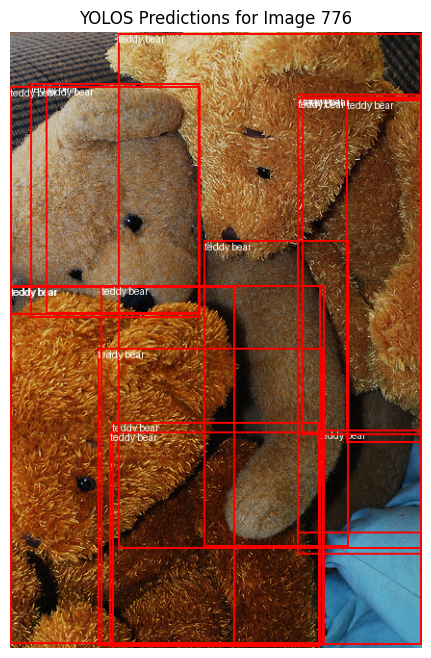

100%|██████████| 630/630 [02:26<00:00,  4.31it/s]


mAP@[0.5:0.95]: tensor(0.3441)
Detailed mAP results: {'map': tensor(0.3441), 'map_50': tensor(0.5307), 'map_75': tensor(0.3608), 'map_small': tensor(0.0789), 'map_medium': tensor(0.3023), 'map_large': tensor(0.5334), 'mar_1': tensor(0.2820), 'mar_10': tensor(0.4365), 'mar_100': tensor(0.4586), 'mar_small': tensor(0.1223), 'mar_medium': tensor(0.4266), 'mar_large': tensor(0.6528), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 3 - Validation mAP Score: 0.3441


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.344133  0.530729  0.360765   0.078909     0.30229   0.533422  0.281995   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.436514  0.458644   0.122265    0.426576   0.652831           -1.0   

   mar_100_per_class  
0               -1.0

  0%|          | 1/368 [00:03<20:27,  3.34s/it]

Epoch 4, Batch 0: Loss = 0.8416


  3%|▎         | 11/368 [00:40<22:10,  3.73s/it]

Epoch 4, Batch 10: Loss = 0.8237


  6%|▌         | 21/368 [01:19<23:57,  4.14s/it]

Epoch 4, Batch 20: Loss = 0.7683


  8%|▊         | 31/368 [01:56<19:04,  3.40s/it]

Epoch 4, Batch 30: Loss = 0.6905


 11%|█         | 41/368 [02:38<20:14,  3.71s/it]

Epoch 4, Batch 40: Loss = 0.6871


 14%|█▍        | 51/368 [03:20<22:20,  4.23s/it]

Epoch 4, Batch 50: Loss = 0.6143


 17%|█▋        | 61/368 [04:02<20:51,  4.08s/it]

Epoch 4, Batch 60: Loss = 0.6882


 19%|█▉        | 71/368 [04:40<17:20,  3.50s/it]

Epoch 4, Batch 70: Loss = 0.5989


 22%|██▏       | 81/368 [05:23<18:41,  3.91s/it]

Epoch 4, Batch 80: Loss = 0.8718


 25%|██▍       | 91/368 [06:07<19:47,  4.29s/it]

Epoch 4, Batch 90: Loss = 0.7618


 27%|██▋       | 101/368 [06:47<16:28,  3.70s/it]

Epoch 4, Batch 100: Loss = 0.7992


 30%|███       | 111/368 [07:29<20:02,  4.68s/it]

Epoch 4, Batch 110: Loss = 0.6106


 33%|███▎      | 121/368 [08:14<18:38,  4.53s/it]

Epoch 4, Batch 120: Loss = 0.7407


 36%|███▌      | 131/368 [08:50<14:54,  3.77s/it]

Epoch 4, Batch 130: Loss = 0.6550


 38%|███▊      | 141/368 [09:27<15:28,  4.09s/it]

Epoch 4, Batch 140: Loss = 0.6799


 41%|████      | 151/368 [10:01<14:28,  4.00s/it]

Epoch 4, Batch 150: Loss = 0.7478


 44%|████▍     | 161/368 [10:43<15:02,  4.36s/it]

Epoch 4, Batch 160: Loss = 0.7956


 46%|████▋     | 171/368 [11:19<14:14,  4.34s/it]

Epoch 4, Batch 170: Loss = 0.7811


 49%|████▉     | 181/368 [12:05<13:50,  4.44s/it]

Epoch 4, Batch 180: Loss = 0.8432


 52%|█████▏    | 191/368 [12:53<13:55,  4.72s/it]

Epoch 4, Batch 190: Loss = 0.6688


 55%|█████▍    | 201/368 [13:34<11:21,  4.08s/it]

Epoch 4, Batch 200: Loss = 0.8427


 57%|█████▋    | 211/368 [14:16<13:12,  5.05s/it]

Epoch 4, Batch 210: Loss = 0.7859


 60%|██████    | 221/368 [14:56<09:45,  3.98s/it]

Epoch 4, Batch 220: Loss = 0.7450


 63%|██████▎   | 231/368 [15:37<09:05,  3.98s/it]

Epoch 4, Batch 230: Loss = 0.6852


 65%|██████▌   | 241/368 [16:18<08:29,  4.01s/it]

Epoch 4, Batch 240: Loss = 0.6510


 68%|██████▊   | 251/368 [16:59<07:52,  4.04s/it]

Epoch 4, Batch 250: Loss = 0.5912


 71%|███████   | 261/368 [17:34<05:49,  3.27s/it]

Epoch 4, Batch 260: Loss = 0.8474


 74%|███████▎  | 271/368 [18:11<06:58,  4.31s/it]

Epoch 4, Batch 270: Loss = 0.7808


 76%|███████▋  | 281/368 [18:48<04:16,  2.95s/it]

Epoch 4, Batch 280: Loss = 0.7725


 79%|███████▉  | 291/368 [19:34<06:26,  5.02s/it]

Epoch 4, Batch 290: Loss = 0.6366


 82%|████████▏ | 301/368 [20:19<05:19,  4.77s/it]

Epoch 4, Batch 300: Loss = 0.7041


 85%|████████▍ | 311/368 [21:00<03:03,  3.22s/it]

Epoch 4, Batch 310: Loss = 0.7445


 87%|████████▋ | 321/368 [21:44<03:42,  4.73s/it]

Epoch 4, Batch 320: Loss = 0.6204


 90%|████████▉ | 331/368 [22:24<02:38,  4.29s/it]

Epoch 4, Batch 330: Loss = 0.7504


 93%|█████████▎| 341/368 [23:06<02:04,  4.61s/it]

Epoch 4, Batch 340: Loss = 0.8792


 95%|█████████▌| 351/368 [23:44<01:10,  4.14s/it]

Epoch 4, Batch 350: Loss = 0.5819


 98%|█████████▊| 361/368 [24:31<00:34,  4.90s/it]

Epoch 4, Batch 360: Loss = 0.9066


100%|██████████| 368/368 [24:55<00:00,  4.07s/it]


Epoch 4 Complete. Average train Loss: 2.8818, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:00<00:00,  1.14s/it]


Epoch 4 - Validation Loss: 2.7772


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.576 at location [320.88, 412.33, 427.91, 636.75]
Detected teddy bear with confidence 0.53 at location [301.69, 68.53, 428.41, 551.04]
Detected teddy bear with confidence 0.767 at location [348.85, 70.88, 427.73, 427.87]
Detected teddy bear with confidence 0.511 at location [-0.45, 58.8, 197.47, 366.11]
Detected teddy bear with confidence 0.944 at location [0.87, 263.17, 321.59, 635.84]
Detected teddy bear with confidence 0.569 at location [298.03, 65.83, 427.87, 524.53]
Detected teddy bear with confidence 0.645 at location [21.96, 54.15, 196.26, 298.7]
Detected teddy bear with confidence 0.653 at location [106.01, 404.97, 321.63, 641.03]
Detected teddy bear with confidence 0.875 at location [303.53, 67.34, 427.63, 419.69]
Detected teddy bear with confidence 0.967 at location [202.04, 215.9, 351.92, 536.25]
Detected teddy bear with confidence 0.861 at location [298.64, 69.5, 428.22, 544.26]
Detected teddy bear with confidence 0.917 at location [112.

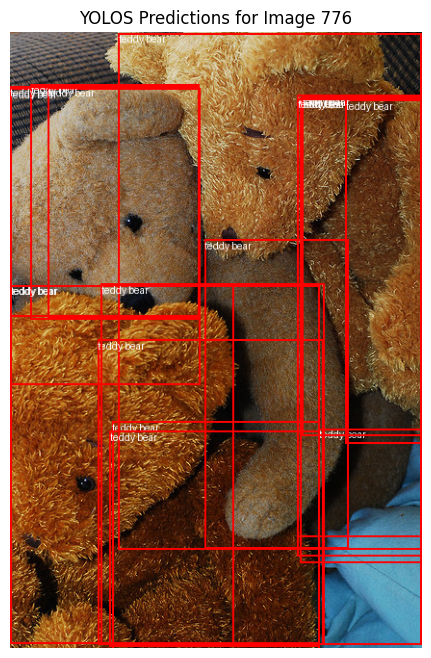

100%|██████████| 630/630 [02:26<00:00,  4.31it/s]


mAP@[0.5:0.95]: tensor(0.3228)
Detailed mAP results: {'map': tensor(0.3228), 'map_50': tensor(0.5019), 'map_75': tensor(0.3355), 'map_small': tensor(0.0608), 'map_medium': tensor(0.2762), 'map_large': tensor(0.5201), 'mar_1': tensor(0.2692), 'mar_10': tensor(0.4184), 'mar_100': tensor(0.4406), 'mar_small': tensor(0.0963), 'mar_medium': tensor(0.4021), 'mar_large': tensor(0.6469), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 4 - Validation mAP Score: 0.3228


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.322758  0.501878  0.335491   0.060791    0.276204   0.520052  0.269198   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.418352  0.440575   0.096349     0.40212   0.646932           -1.0   

   mar_100_per_class  
0               -1.0

Early stopping triggered - Training Stopped!


In [ ]:
# Train Setting
epochs = 10
optimizer = torch.optim.AdamW(lora_parameters, lr=5e-5, weight_decay=0.01)
scheduler = CosineAnnealingLR(optimizer, T_max=5, eta_min=1e-6)
early_stopping = EarlyStopping(patience=3)

# Train the LoRA model
best_mAP_score_LoRA, epochs_list_LoRA, train_total_losses_LoRA, val_total_losses_LoRA, train_focal_losses_LoRA, train_bbox_losses_LoRA, train_giou_losses_LoRA, mAP_scores_LoRA = train_model(
    model_with_LoRA, processor, train_dataloader, val_dataloader, optimizer, scheduler, early_stopping, device, "lora_model.pth", epochs
)


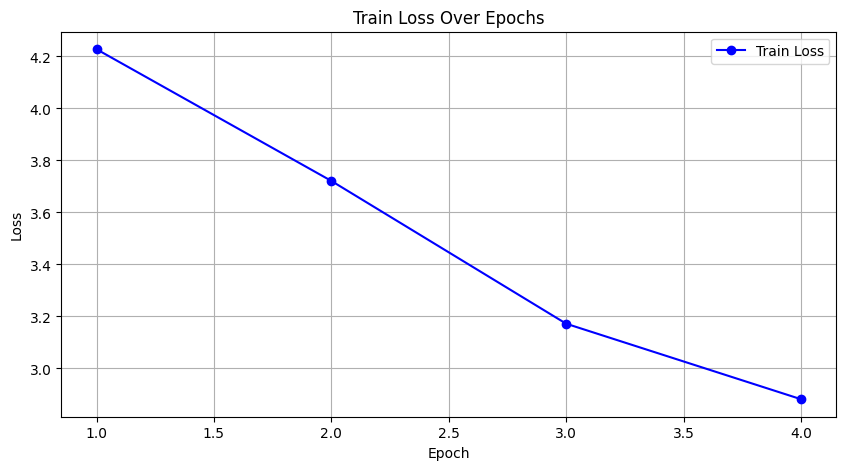

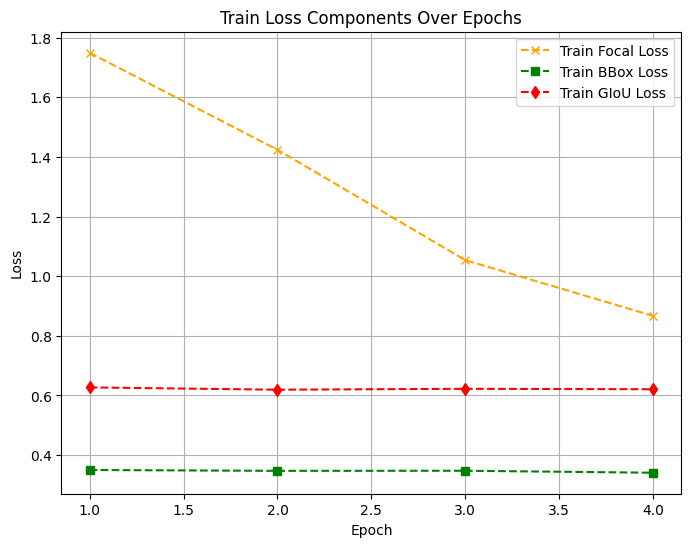

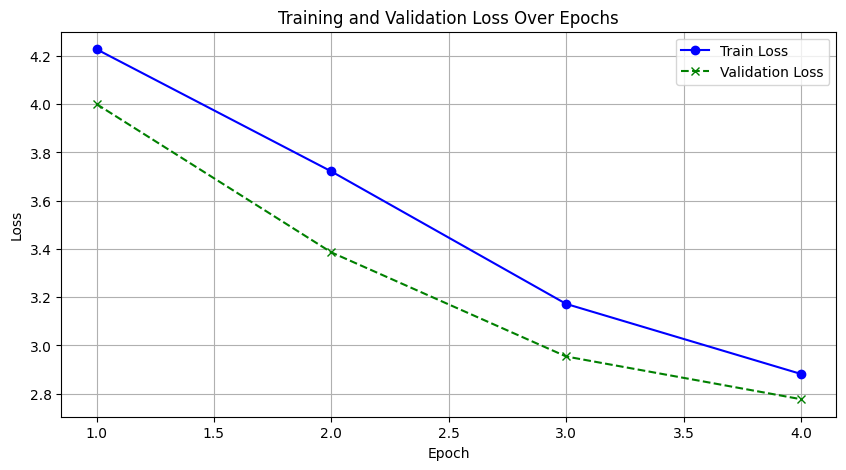

In [ ]:
plot_loss_graphs(epochs_list_LoRA, train_total_losses_LoRA, train_focal_losses_LoRA, train_bbox_losses_LoRA, train_giou_losses_LoRA, val_total_losses_LoRA)


In [ ]:
# Load the saved model with best mAP score
model_with_LoRA = torch.load("lora_model.pth", map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print(model_with_LoRA.peft_config)

# Check which weights have been updated
for name, param in model_with_LoRA.named_parameters():
    if param.requires_grad:
        print(f"{name} Trainable (Updated)")
    else:
        print(f"{name} Frozen (Original)")

print(model_with_LoRA)


{'default': LoraConfig(task_type=None, peft_type=<PeftType.LORA: 'LORA'>, auto_mapping=None, base_model_name_or_path='hustvl/yolos-small', revision=None, inference_mode=False, r=16, target_modules={'query', 'value'}, exclude_modules=None, lora_alpha=8, lora_dropout=0.5, fan_in_fan_out=False, bias='none', use_rslora=False, modules_to_save=None, init_lora_weights=True, layers_to_transform=None, layers_pattern=None, rank_pattern={}, alpha_pattern={}, megatron_config=None, megatron_core='megatron.core', trainable_token_indices=None, loftq_config={}, eva_config=None, corda_config=None, use_dora=False, layer_replication=None, runtime_config=LoraRuntimeConfig(ephemeral_gpu_offload=False), lora_bias=False)}
base_model.model.vit.embeddings.cls_token Frozen (Original)
base_model.model.vit.embeddings.detection_tokens Frozen (Original)
base_model.model.vit.embeddings.position_embeddings Frozen (Original)
base_model.model.vit.embeddings.patch_embeddings.projection.weight Frozen (Original)
base_mode

<ipython-input-36-7dc6f7b54082>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_with_LoRA = torch.load("lora_model.pth", map_location=torch.device("cuda" if torch.cud

In [ ]:
# Mean value of LoRA layers after training
for name, param in model_with_LoRA.named_parameters():
    if "lora" in name:
        print(f"{name} mean after training: {param.data.mean().item():.6f}")


base_model.model.vit.encoder.layer.0.attention.attention.query.lora_A.default.weight mean after training: -0.000077
base_model.model.vit.encoder.layer.0.attention.attention.query.lora_B.default.weight mean after training: 0.000008
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_A.default.weight mean after training: 0.000145
base_model.model.vit.encoder.layer.0.attention.attention.value.lora_B.default.weight mean after training: -0.000008
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_A.default.weight mean after training: 0.000336
base_model.model.vit.encoder.layer.1.attention.attention.query.lora_B.default.weight mean after training: -0.000009
base_model.model.vit.encoder.layer.1.attention.attention.value.lora_A.default.weight mean after training: 0.000140
base_model.model.vit.encoder.layer.1.attention.attention.value.lora_B.default.weight mean after training: 0.000035
base_model.model.vit.encoder.layer.2.attention.attention.query.lora_A.default

#### **Evaluate Model with LoRA**

0it [00:00, ?it/s]

Detected sports ball with confidence 1.0 at location [49.81, 193.56, 188.7, 328.92]
Detected person with confidence 0.909 at location [141.77, 22.27, 461.96, 475.78]
Detected person with confidence 0.998 at location [425.66, 29.5, 618.62, 477.16]
Detected person with confidence 0.517 at location [104.24, 21.67, 459.42, 475.69]
Detected person with confidence 0.997 at location [16.72, 21.51, 461.12, 475.09]


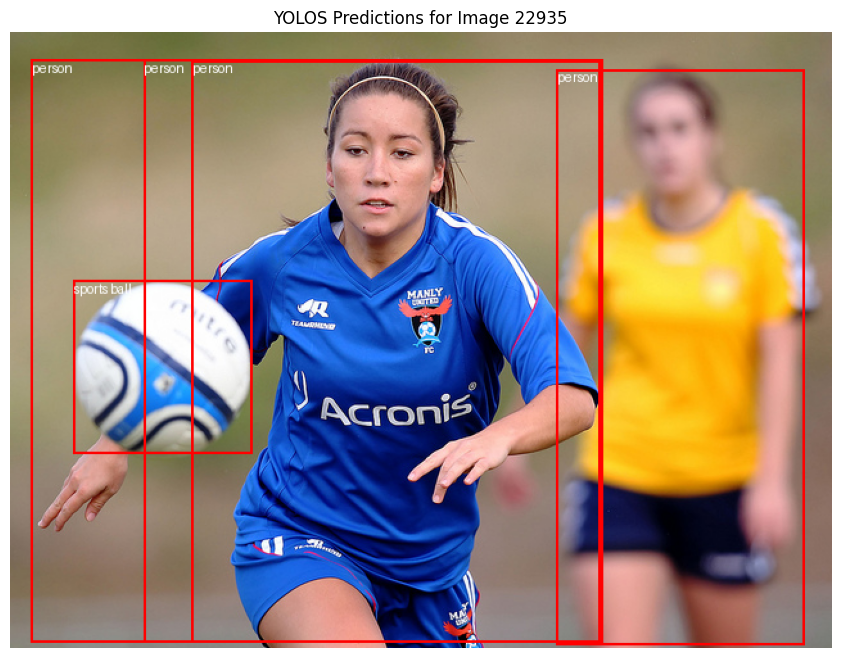

900it [03:43,  4.03it/s]


mAP@[0.5:0.95]: tensor(0.3334)
Detailed mAP results: {'map': tensor(0.3334), 'map_50': tensor(0.5162), 'map_75': tensor(0.3439), 'map_small': tensor(0.0924), 'map_medium': tensor(0.3192), 'map_large': tensor(0.5103), 'mar_1': tensor(0.2853), 'mar_10': tensor(0.4166), 'mar_100': tensor(0.4294), 'mar_small': tensor(0.1507), 'mar_medium': tensor(0.4091), 'mar_large': tensor(0.5996), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Model with LoRA Performance (mAP): tensor(0.3334)
Model with LoRA Performance (mAP):
        map    map_50    map_75  map_small  map_medium  map_large     mar_1 

map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.333389  0.516249  0.343871   0.092381    0.319208    0.51027  0.285329   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.416556  0.429368   0.150678    0.409134   0.599635           -1.0   

   mar_100_per_class  
0               -1.0

In [ ]:
model_with_LoRA_results = evaluate_model(model_with_LoRA, processor, test_dataset, yolos_categories)
print("Model with LoRA Performance (mAP):", model_with_LoRA_results["map"])

model_with_LoRA_results_dict = {
    key: value.item() if isinstance(value, torch.Tensor) else value
    for key, value in model_with_LoRA_results.items()
    if key != "classes"
}
model_with_LoRA_results_df = pd.DataFrame([model_with_LoRA_results_dict])
print("Model with LoRA Performance (mAP):")
print(model_with_LoRA_results_df)
display(model_with_LoRA_results_df)
